<a href="https://colab.research.google.com/github/PrayasSarkar/Projects/blob/main/A_B_Testing_the_art_and_science_of_data_driven_choices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to A/B Testing Using The P-Value Method**

Immagine You are a project manager at a company. Two years ago, your team launched a new website blog that is only available a light mode. Last week, while you were reading your e-book, you noticed that you switched it to dark mode right after you downloaded the e-book reading app.

You start contemplating whether your company's website blog should also feature a dark mode, but you are not sure if this would actually be worth doing. You're wondering if readers avoid subscribing due to eye discomfort while reading your blog. In this lab, we will be working with Python and be introduced to A/B Testing and use this method to see if more readers/users would actually convert to this website blog if we made that available in dark mode.

Objectives

After completing this lab we will be able to:

1. Use A/B Testing to determine which variant is better performing.
2. Work with p-values and interpret the conclusion
3. Use Python to perform data cleaning and data visualizations





Setup

For this lab, we will be using the following libraries:

1. pandas for managing the data.
2. numpy for mathematical operations.
3. sklearn for machine learning and machine-learning-pipeline related functions.
4. seaborn for visualizing the data.
5. matplotlib for additional plotting tools.

In [6]:
!pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
!pip install pmdarima -U
!pip install --upgrade pmdarima==2.0.2
!pip install skillsnetwork



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)
  Attempting uninstall: pmdarima
    Found existing installation: pmdarima 2.0.2
    Uninstalling pmdarima-2.0.2:
      Successfully uninstalled pmdarima-2.0.2
  Using cached pmdarima-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (1.9 MB)
  Attem

In [4]:
!pip install tqdm pmdarima

**Importing Required Libraries**

We recommend you import all required libraries in one place (here):

In [7]:
from tqdm import tqdm
import skillsnetwork
import numpy as np
import pandas as pd
#from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
%matplotlib inline
from math import ceil

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

**A/B Testing Background**

Before we delve into **A/B Testing,** we should first understand:

1. What A/B Testing does
2. The steps to A/B Testing

**What does A/B Testing do?**

**The foundemental of A/B Testing:**

A/B Testing is a technique used to compare two variants of a variable (old vs. new page, email vs. no email, ...). Often, this is employed to determine whether one variant performs better than the other by splitting our users into two groups: one that receives the treatment (gets the new version of the website, receives the email about the new campaign, ...) and one that does not. A/B testing is an essential of digital strategy, enabling businesses to make informed decisions based on real user data. By optimizing digital experiences through A/B testing, companies can enhance user engagement, increase conversion rates, and ultimately drive business growth.

**The steps to A/B Testing**

To conduct A/B Testing, we need to follow these steps:

1. Designing the experiment
2. Collecting and preparing the data
3. Visualising the results
4. Testing the hypothesis
5. Drawing conclusions

**Taking a look at our data**

Your company's website has always been in light mode, and recently, it's exploring the possibility of introducing a dark mode. The objective is to assess whether implementing a dark mode will result in a higher conversion rate for users visiting the website.

A system has been implemented to collect the following data:

1. **user_id**: the user ID of the person who clicks into your company's website
2. **timestamp**: the date and time when the user visited the website
3. **group**: the group to which the user belongs (treatment vs control)
4. **landing_page**: the page that the user lands on (old vs new page, representing light vs dark mode, respectively)
5. **converted**: whether or not the user has converted to the new page

Your task is to determine whether the new version of the page will increase the users' conversion rate on the website.

Before we dive in, let's take a look at our data by loading the ab_data dataset into a pandas.DataFrame:

In [8]:
df = pd.read_csv('/content/ab_data.csv')

Let's look at some samples rows from the dataset we loaded:

In [9]:
df.sample(5)

,user_id,timestamp,group,landing_page,converted
276912,861154,2017-01-17 08:08:17.429087,treatment,new_page,0
171604,731692,2017-01-18 22:07:17.991861,treatment,new_page,0
161976,900242,2017-01-23 08:02:31.533103,control,old_page,0
191188,854821,2017-01-06 03:07:01.336039,control,old_page,0
62347,815900,2017-01-14 22:53:00.875529,control,old_page,0


For clarity, let's create a new column "version", such that if the landing page is the old one, then this means that it is the light mode, otherwise in dark mode.

In [10]:
df['version'] = np.where(df['landing_page'] == 'new_page', 'dark_mode', 'light_mode')
df.head(5)

,user_id,timestamp,group,landing_page,converted,version
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,light_mode
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,light_mode
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,dark_mode
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,dark_mode
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,light_mode


Let's take a look at how many users are assigned to the treatment or control groups.

In A/B tests, to test whether a variant is efficient or not, the users are separated into two groups: the treatment group and control group. The treatment group receives the change or the treatment, and the control group does not.

From the output below, roughly half of the users are in the control group and the other half receive the treatment.

In [11]:
df['group'].value_counts()

,count
group,
treatment,147276
control,147202


In our study, the treatment group gets the new page in dark mode, and the control group stays with the old page or the light mode. We should expect the number of people who get the new page to be equal to the number of people who receive the treatment. Similarly, we expect the number of users that get the old page be equal to the number of people who are in the control group.

In [12]:
df['landing_page'].value_counts()

,count
landing_page,
old_page,147239
new_page,147239


Unfortunately, the results do not match. We will be able to clean the data set in the upcoming steps.

Observe the percentage of users who convert to the website in the two groups. In the converted column, if the user converts, this is denoted by 1, and 0 otherwise. We can calculate the conversion rate using the mean function across the column.

In [13]:
# filter the data based off of the version (dark or light mode)
old_conversion = df[df['version'] == 'light_mode']
new_conversion = df[df['version'] == 'dark_mode']

# get the conversion rates
light_converted = old_conversion['converted'].mean()
dark_converted = new_conversion['converted'].mean()

# print the results
print("The conversion rate in the group using light mode is: %.2f%%" % (100 * light_converted))
print("The conversion rate in the group using dark mode is: %.2f%%" % (100 * dark_converted))

The conversion rate in the group using light mode is: 12.05%
The conversion rate in the group using dark mode is: 11.88%


Let's see if there are any null values in the data set:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
 5   version       294478 non-null  object
dtypes: int64(2), object(4)
memory usage: 13.5+ MB


Our dataset has 294,478 entries and 294,478 non-null. This means that we don't have any null values, hence we don't need to drop any observations... for now.

1. Designing the experiment

What is hypothesis testing?

In Statistics, hypothesis testing is a method used in statistical inference to test an assumption about a parameter.

The null hypothesis  𝐻0 is an assumption we would like to test about a population. Often, this is where we test about the absence of the effect.

The alternative hypothesis  𝐻1
  or  𝐻𝐴
  claims that there is an effect on the population.

Here is an example:

Suppose you wish to see whether a coin is fair by flipping it 10 times. After flipping the coin 10 times, you get the following result: [H, H, H, H, T, H, H, H, H, H] where H is heads and T is tails. You do a hypothesis testing to see how probable it was to see that result under the null hypothesis. Let's set our level of significance to be 5%.

𝐻0:The coin is fair

𝐻1:The coin is not fair

Since each of the flips is independent, the coin is represented as a Bernoulli distribution, where  𝑝
  is the probability of flipping Heads. Under the null hypothesis, the coin is fair. Therefore the probability of flipping Heads is  𝑝=0.5
  The probability of observing 1 tails and 9 heads is:

(109)𝑝8(1−𝑝)2=(109)(0.5)8(1−0.5)2=(109)(0.5)10=0.009765625
  
  The probability of observing 9 heads in our flips under the assumption that the coin is fair is 0.009765625. Observing that result was not very probable under the null hypothesis.

From our result, the probability of flipping heads is  910=0.9

The critical z-score when the level of significance is 5% is -1.96 and 1.96. Let's derive how many heads, denoted by  𝑛𝑝̂ we should've seen:

−1.96≤𝑛𝑝̂ −𝑛𝑝0𝑛𝑝0(1−𝑝0)⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√≤1.96−1.96≤𝑛𝑝̂ −10∗0.510∗0.5(0.5)⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√≤1.96−1.96≤𝑛𝑝̂ −52.5⎯⎯⎯⎯⎯√≤1.96−3.099≤𝑛𝑝̂ −5≤3.0992.099≤𝑛𝑝̂ ≤8.099

This shows that observing 9 heads in the result is highly not probable. We should've seen more than 2, less than 8 heads. We can reject the null hypothesis since we have evidence against it. The coin was probably not fair.

Now, let's define the hypothesis to be tested or the metrics under examination for our case study.

Examples of commonly tested metrics include conversion rates, the number of signups, click-through rates, etc. For this case, let's focus on the conversion rate.

Formulating a hypothesis
Since we don't actually know which of the website pages will perform better, this will be a two-sided test.

Null Hypothesis: The conversion rate for the two website designs is the same
𝐻0:𝑝=𝑝0


Alternative Hypothesis: The conversion rate for the two website designs is not the same
𝐻1:𝑝≠𝑝0

where  𝑝
  is the conversion rate for the new page, and  𝑝0
  is the conversion rate for the old page

Let's set a confidence interval of  95%
 , hence our level of significance will be  𝛼=1−0.95=5%


We will determine whether or not there is a (significant) difference between the two pages by computing the p-value



2. Collect and Prepare the Data

View the Data

Let's see if we have any users that appear more than one in our dataset. duplicated (same user_id, same landing page, and same group)

In [15]:
# check if some users appear multiple times
user_sessions = df['user_id'].value_counts()

multiple_times_user = user_sessions[user_sessions > 1].count()

multiple_times_user

np.int64(3894)

This result indicates that we have users that is appears multiple times. Since this is small compared to our dataset, we can directly remove those observations from our data. Let's remove the duplicates:

In [16]:
dr = user_sessions[user_sessions > 1].index
df = df[~df['user_id'].isin(dr)]

df.head(5)

,user_id,timestamp,group,landing_page,converted,version
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,light_mode
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,light_mode
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,dark_mode
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,dark_mode
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,light_mode


In [17]:
df.shape[0]

286690

We've showed that we have successfully removed observations with users that appear multiple times.

**Picking the sample**

Our data contains 286,690 rows, which is not little. There are instances where datasets extend into the millions, presenting a considerable challenge in terms of both time and space for conducting testing. We can derive conclusive insights by working with a sample of our data. However, determining the optimal sample size from the outset may not be immediately evident.
​
However, we do know:
- $\alpha = 5\%$
- The power is the test is usually set to $1 - \beta = 80\%$
- effect size: $2\%$
​
Usually, a good baseline conversion rate falls within the range of $10 - 15\%$, let's use $13\%$ as our baseline conversion rate in this case.
Moreover, our team anticipates a conversion rate of $15\%$, thereby justifying the chosen effect size of $2\%$.
​
Fortunately, Python facilitates this process seamlessly through the `statsmodel` library!
​

**A refresher on levels of significance, type I and II errors**

The level of significance represents the likelihood of observing your results under the assumption that the null hypothesis is true. Essentially, it quantifies the probability of committing a type I error.

A type I error occurs when we fail to reject the null hypothesis despite it being false. In simpler terms, this is akin to making a false positive conclusion.

Conversely, a type II error, referred to as a false negative conclusion, occurs when we incorrectly reject the null hypothesis when it is, in fact, true. The probability of making a false negative conclusion is denoted as  𝛽
 .

In [18]:
effect_size = sms.proportion_effectsize(0.13, 0.15)

sample_size = sms.NormalIndPower().solve_power(
    effect_size,
    power = 0.8,
    alpha = 0.05,
    ratio = 1
)

sample_size = ceil(sample_size)

sample_size

4720

We would need to sample 4,720 observations from each group so that our test can be effective.

We should also select our 2 samples: the treatment sample and the control sample:

In [19]:
# The treatment and control samples
trt_sample = df[df['group']=='treatment'].sample(n=sample_size, random_state=888)

con_sample = df[df['group'] == 'control'].sample(n=sample_size, random_state=0)

# Combining into one dataframe and resetting the indices
df = pd.concat([con_sample, trt_sample], axis=0)
df.reset_index(drop=True, inplace=True)

df.sample(5)

,user_id,timestamp,group,landing_page,converted,version
1937,645582,2017-01-11 18:51:37.222227,control,old_page,1,light_mode
1917,903728,2017-01-24 08:07:04.271235,control,old_page,0,light_mode
2863,933981,2017-01-07 21:21:36.808262,control,old_page,0,light_mode
180,730605,2017-01-08 05:27:07.914965,control,old_page,0,light_mode
1129,930430,2017-01-14 19:00:19.902089,control,old_page,1,light_mode


3. Visualize the results

Before we do any testing, let's take a look of our data to see the conversion rate of each group.

In [20]:
df.groupby(['group','version']).agg({'converted': 'mean'})

,,converted
group,version,
control,light_mode,0.111017
treatment,dark_mode,0.125000


From this output, we see that for users that were shown the light mode website, about 11.10% of them converted. Also, about 12.5% users who were exposed to the dark mode website converted. From the numbers alone, there seems to be an increase.

Let's see it from a bar plot:

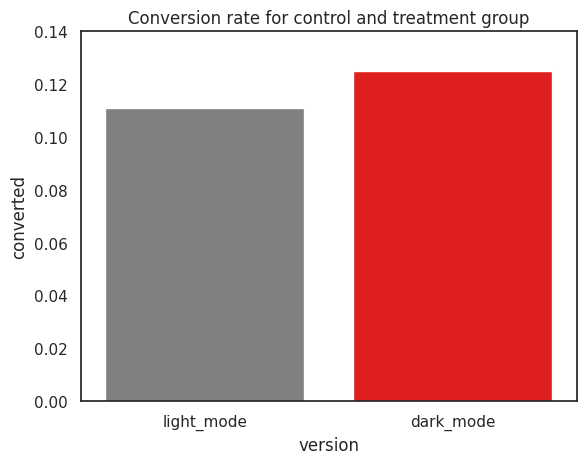

In [21]:
sns.barplot(x = df['version'], y = df['converted'], palette = ['gray', 'red'], ci = False)
plt.ylim(0, 0.14)
plt.title('Conversion rate for control and treatment group')
plt.show()

4. Testing the Hypothesis

We can now go ahead and calculate the p-value.

What is a p-value?

A p-value is the probability to observe a value as extreme as the observed value assuming that the null hypothesis is true.

In step 1, we set that we have a 95% level of confidence, which results in a level of significance of 5%.

In [22]:
conv_cont = df[df['group'] =='control']['converted']
conv_trt = df[df['group'] =='treatment']['converted']
n_cont = conv_cont.count()
n_trt = conv_trt.count()
num_converted = [conv_cont.sum(), conv_trt.sum()]
nobs = [n_cont, n_trt]
# p-value?
z_stat, pval = sms.proportions_ztest(num_converted, nobs=nobs)
pval

np.float64(0.03524195278525257)

How to interpret a p-value?

Values of p	Inference
1. p > 0.1 - No evidence against the null hypohesis
2. 0.05 < p < 0.10 - Weak evidence against the null hypohesis
3. 0.01 < p < 0.05 - Moderate evidence against the null hypohesis
4. 0.05 < p < 0.001 - Good evidence against the null hypohesis
5. 0.001 < p < 0.01 - Strong evidence against the null hypohesis
6. p < 0.001 - Very strong evidence against the null hypohesis


From the result, the p-value is 0.0352, which is less than 0.05. This means that we have moderate evidence against the null hypothesis.

In this case, we would reject the null hypothesis. This means that we cannot say that there is no difference in conversion rate between dark mode and light mode users.

The team can definitely choose to implement a dark mode version of the blog, but can continue monitoring the conversion results as time goes by.